## **Car Price Prediction (Poland)**

In [60]:
#Mounting drive data to Google colab (I have used Google colab as my Jupyternote was crashing most of the time)
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#installing or importing important lib to perform operations on the data
#using SK learn lib for evaulation
#seaborn for plot


import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


import seaborn as sns
import matplotlib.pyplot  as plt
%matplotlib inline

In [4]:
#using function to call we drop the unncecessary column in the dataframe

def Delete_data(Dataframe, columns):

    Dataframe.drop(columns, axis=1, inplace=True)
    return Dataframe

In [5]:
#using function to call the model at one place to draw the results
#print the regression result 

def Results(model, prediction, Name):
    R2 = model.score(X_Train, Y_Train) #Gives the adjusted R squared value
    Adj_R2 = 1 - (1-model.score(X_Train, Y_Train))*(len(Y_Train)-1)/(len(Y_Train)-X_Train.shape[1]-1) #Formula for the adjusred R square value

#                           $$-------------------------------------$$
    import math
    MSE = np.square(np.subtract(Y_Test,prediction)).mean()    #Gives the Means square value
    RMSE = math.sqrt(MSE)   #Gives the root Means square value

#                           $$-------------------------------------$$
    Accuracy = model.score(X_Test,Y_Test)  

    print('Below are the Results of the Model' + Name )

    print("The Accuracy of the model is:\n")
    print(Accuracy)

    print("The Mean Square Error Value of the model\n")
    print(MSE)

    print("The Root Mean Square Error of the model\n")
    print(RMSE)

    print("The R - Squared Value of the model:\n")
    print(R2)

    print("The Adjusted R - Square Value of the model:\n")
    print(Adj_R2)



In [6]:
#Model Evaualation call, takes the call from the evaulation and pass it to result column to print result
def Model_Evaluation(model, Name):


    model.fit(X_Train,Y_Train)  #Fit the model dependent and independent variable

    prediction = model.predict(X_Test)  #give the model prediction for the test data

    Results(model, prediction, Name) #call function


In [7]:
## Import the data from the csv and putting it to Data Frame

Path = '/content/gdrive/My Drive/DMML/Car_Prices_P.csv'

Df = pd.read_csv(Path)



In [8]:
Df.head(10) #displays the head of the model

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
5,5,opel,combo,gen-d-2011,2017,121203,1598,Diesel,Warszawa,Mazowieckie,51900
6,6,opel,combo,gen-d-2011,2017,119965,1248,Diesel,Wrocław,Dolnośląskie,44700
7,7,opel,combo,gen-d-2011,2016,201658,1248,Diesel,Lublin,Lubelskie,29000
8,8,opel,combo,gen-d-2011,2014,178666,1598,Diesel,Złotów,Wielkopolskie,28900
9,9,opel,combo,gen-d-2011,2015,113000,1248,Diesel,Strzyżew,Mazowieckie,34900


In [9]:
Df.describe() #Gives the data description of the Quantative variables

,Unnamed: 0,year,mileage,vol_engine,price
count,117927.000000,117927.000000,1.179270e+05,117927.000000,1.179270e+05
mean,58963.000000,2012.925259,1.409768e+05,1812.057782,7.029988e+04
std,34042.736935,5.690135,9.236936e+04,643.613438,8.482458e+04
min,0.000000,1945.000000,0.000000e+00,0.000000,5.000000e+02
25%,29481.500000,2009.000000,6.700000e+04,1461.000000,2.100000e+04
50%,58963.000000,2013.000000,1.462690e+05,1796.000000,4.190000e+04
75%,88444.500000,2018.000000,2.030000e+05,1995.000000,8.360000e+04
max,117926.000000,2022.000000,2.800000e+06,7600.000000,2.399900e+06


# Adopting the KDD Methodologies 

Step 1: Data Collection

Step 2: Pre-processing and Exploring the data

Step 3: Data Preparation

Step 4: Model Training

Step 5: Evaluating Model Performance

Step 6: Improving Model Performance 

## Step 2: Pre-processing and Exploring the data

## Step 3: Data Preparation

In [10]:
#Performing EDA to Find Null Values
#Generatino type has more null values, we remove that column further

Df.isna().sum()

Unnamed: 0             0
mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

In [11]:
#find if there are any duplicate values in the datasets

Df.duplicated().sum()

0

In [12]:
#Generation has so many missing values so dropping it
Df.drop(columns="generation_name", inplace=True)
Df

,Unnamed: 0,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
...,...,...,...,...,...,...,...,...,...,...
117922,117922,volvo,xc-90,2020,40000,1969,Hybrid,Katowice,Śląskie,222790
117923,117923,volvo,xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie,229900
117924,117924,volvo,xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie,135000
117925,117925,volvo,xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie,154500


**EDA - Visualization**

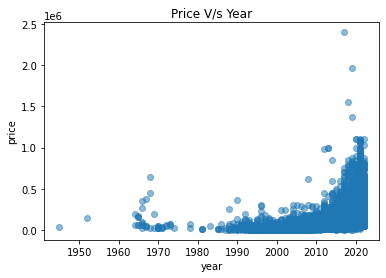

In [13]:
#scatter plot use to plot Outcome Price V/s Year
plt.scatter(Df['year'],Df['price'],alpha=0.5 )
plt.title('Price V/s Year')
plt.xlabel('year')
plt.ylabel('price') 
#Shows the plot
plt.show()


Learnings: As the Year decreses the price increses ( which make sence for the used cars
also the notable observation here is that the cars betwn 1960-1970 are price taged more may be because they are treated as **Vintage car**



In [14]:

#considering the cars only from 1980 onwards as below 1980 
#is mostly considered as vintage cars, which may lead our model desc so removing those columns from DF

Df.drop(Df[Df.year < 1980].index, inplace=True)

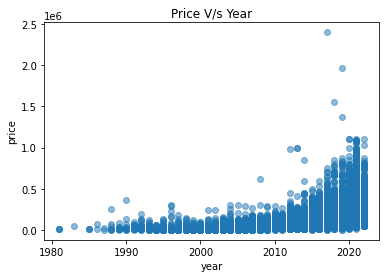

In [15]:
#After droping
plt.scatter(Df['year'],Df['price'],alpha=0.5 )
plt.title('Price V/s Year')
plt.xlabel('year')
plt.ylabel('price') 
plt.show()

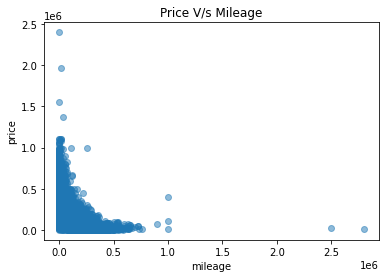

In [16]:
#scatter plot use to plot Outcome Price V/s Mileage
plt.scatter(Df['mileage'],Df['price'],alpha=0.5 )
#Adding the aesthetics
plt.title('Price V/s Mileage')
plt.xlabel('mileage')
plt.ylabel('price') 
#Show the plot
plt.show()

Learnings: Price increses per the KM driven 

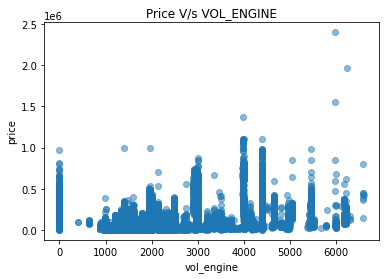

In [17]:
#scatter plot use to plot Outcome Price V/s VOL_ENGINE
plt.scatter(Df['vol_engine'],Df['price'],alpha=0.5 )
plt.title('Price V/s VOL_ENGINE')
plt.xlabel('vol_engine')
plt.ylabel('price') 
plt.show()

Text(0, 0.5, 'count')

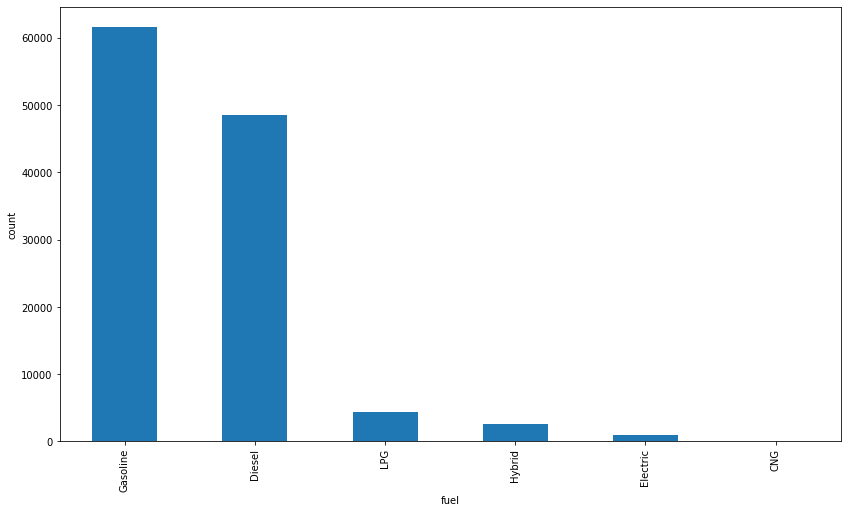

In [18]:
#count plots to lean about the usage of the car fuel types 
#Gasoline is the most and CNG is the least listed cars in terms of fuel price
x = Df['fuel'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="")
x.set_xlabel("fuel")
x.set_ylabel("count")

Text(0, 0.5, 'count')

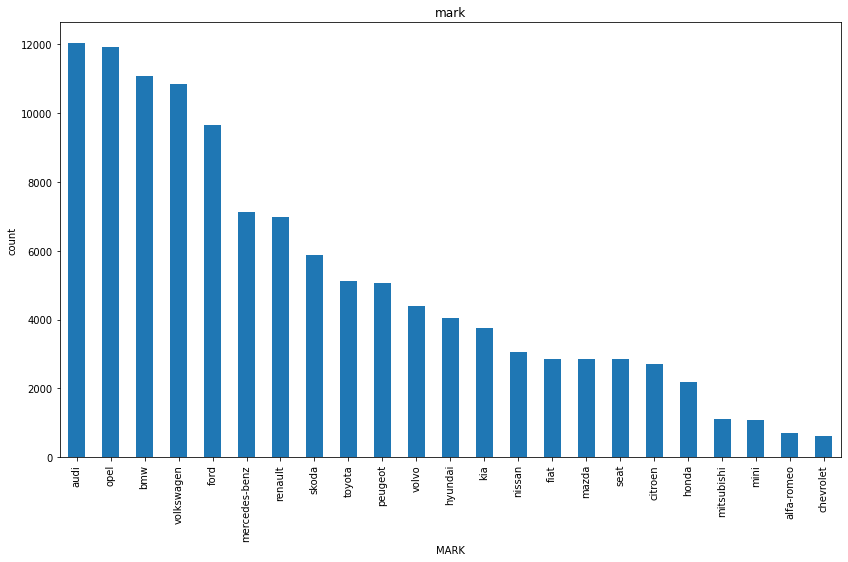

In [19]:
# Barplot depects Lists of famous cars listed on the website 
x = Df['mark'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="mark")
x.set_xlabel("MARK")
x.set_ylabel("count")

In [20]:
Df

,Unnamed: 0,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
...,...,...,...,...,...,...,...,...,...,...
117922,117922,volvo,xc-90,2020,40000,1969,Hybrid,Katowice,Śląskie,222790
117923,117923,volvo,xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie,229900
117924,117924,volvo,xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie,135000
117925,117925,volvo,xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie,154500


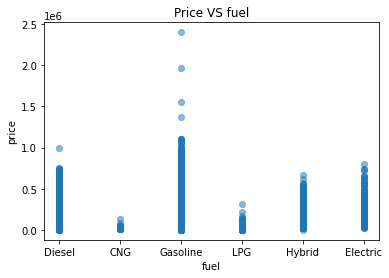

In [21]:

#scatterplot depects the price vs car fuel types
#Adding the aesthetics
plt.scatter(Df['fuel'],Df['price'],alpha=0.5 )
plt.title('Price VS fuel')
plt.xlabel('fuel')
plt.ylabel('price') 
#Show the plot
plt.show()

Text(0, 0.5, 'count')

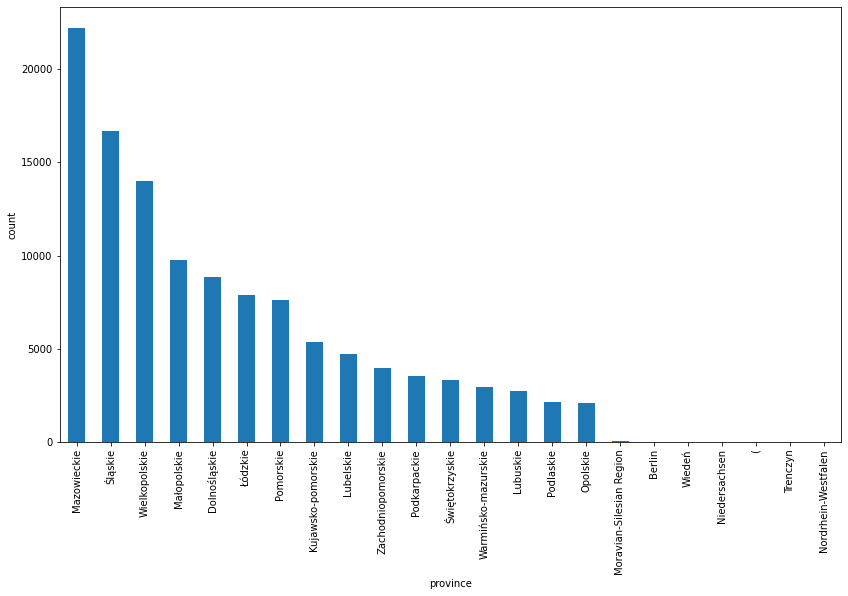

In [22]:
# Barplot depects the count vs provice per used car sell listed on the website
x = Df['province'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="")
x.set_xlabel("province")
x.set_ylabel("count")

In [23]:
Df

,Unnamed: 0,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
...,...,...,...,...,...,...,...,...,...,...
117922,117922,volvo,xc-90,2020,40000,1969,Hybrid,Katowice,Śląskie,222790
117923,117923,volvo,xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie,229900
117924,117924,volvo,xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie,135000
117925,117925,volvo,xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie,154500


In [24]:
#Drop the first column which has just index 
Df.drop(columns=Df.columns[0], 
        axis=1, 
        inplace=True)

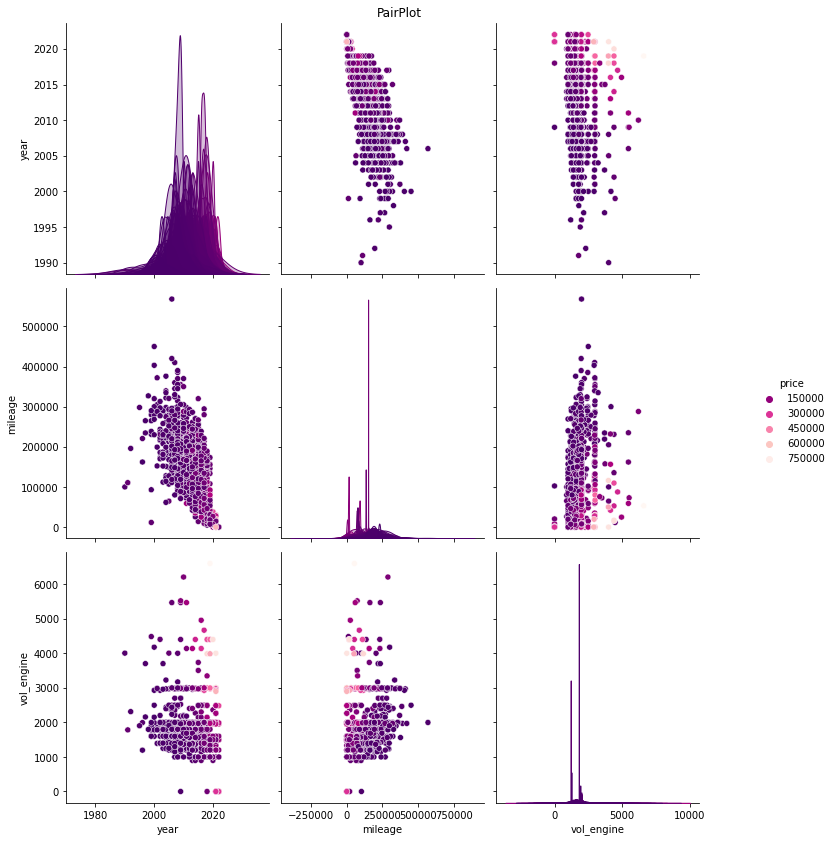

In [25]:
#Pair plot is ploted to check the distribution of the variables 

Df_sample = Df.sample(frac=0.01) #compression
pair = sns.pairplot(Df_sample,corner=False,hue="price",palette="RdPu_r")
pair.fig.suptitle(f"PairPlot",y=1.,fontsize=12)
pair.fig.set_size_inches(12,12)
plt.show()

In [26]:
#converting the Qualitative variable to the categorical for model evaulation

def Encoding_cat(Dataframe, columns):

    Dataframe = Dataframe.replace(columns)
    Dataframe.head() 

    return Dataframe

In [27]:
#Categorical encoding
cleanup_nums = {"fuel": {'CNG': 1, "LPG": 2,'Diesel': 3, "Hybrid": 4, "Electric":5, 'Gasoline': 6}
}
      
Df = Encoding_cat( Df, cleanup_nums)#calling function

In [28]:
Df.head()

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,2015,139568,1248,3,Janki,Mazowieckie,35900
1,opel,combo,2018,31991,1499,3,Katowice,Śląskie,78501
2,opel,combo,2015,278437,1598,3,Brzeg,Opolskie,27000
3,opel,combo,2016,47600,1248,3,Korfantów,Opolskie,30800
4,opel,combo,2014,103000,1400,1,Tarnowskie Góry,Śląskie,35900


In [29]:
# Drop the unwanted column for the prediction 
#Droping model as it does not have any unique values
#Mark Car model tried to encode and took out the correlation and found it is not use full for price prediction so removed
#Droping city and province as it does not have any unique values

Df.drop(columns=['model','mark','city','province'], 
        axis=1, 
        inplace=True)
Df

,year,mileage,vol_engine,fuel,price
0,2015,139568,1248,3,35900
1,2018,31991,1499,3,78501
2,2015,278437,1598,3,27000
3,2016,47600,1248,3,30800
4,2014,103000,1400,1,35900
...,...,...,...,...,...
117922,2020,40000,1969,4,222790
117923,2017,51000,1969,3,229900
117924,2016,83500,1969,6,135000
117925,2017,174000,1969,3,154500


In [30]:
Df.dtypes

year          int64
mileage       int64
vol_engine    int64
fuel          int64
price         int64
dtype: object

In [31]:
#to convert it to dummy converting the datatype
Df[['fuel']] = Df[['fuel']].astype(str)
Df

,year,mileage,vol_engine,fuel,price
0,2015,139568,1248,3,35900
1,2018,31991,1499,3,78501
2,2015,278437,1598,3,27000
3,2016,47600,1248,3,30800
4,2014,103000,1400,1,35900
...,...,...,...,...,...
117922,2020,40000,1969,4,222790
117923,2017,51000,1969,3,229900
117924,2016,83500,1969,6,135000
117925,2017,174000,1969,3,154500


In [32]:
#create dummy variables
Df=pd.get_dummies(Df,drop_first=True)
Df

,year,mileage,vol_engine,price,fuel_2,fuel_3,fuel_4,fuel_5,fuel_6
0,2015,139568,1248,35900,0,1,0,0,0
1,2018,31991,1499,78501,0,1,0,0,0
2,2015,278437,1598,27000,0,1,0,0,0
3,2016,47600,1248,30800,0,1,0,0,0
4,2014,103000,1400,35900,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
117922,2020,40000,1969,222790,0,0,1,0,0
117923,2017,51000,1969,229900,0,1,0,0,0
117924,2016,83500,1969,135000,0,0,0,0,1
117925,2017,174000,1969,154500,0,1,0,0,0


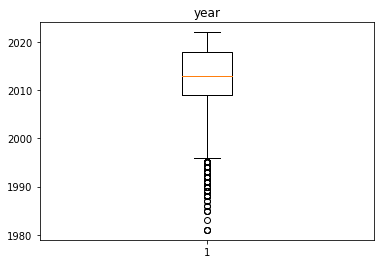

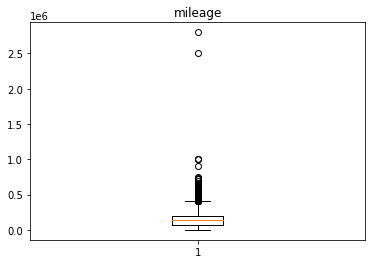

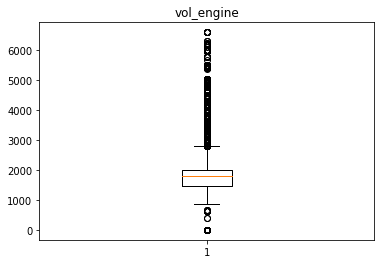

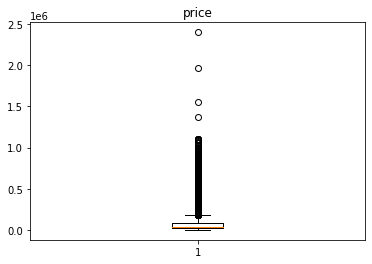

In [33]:
features = ['year',"mileage", "vol_engine", 'price' ]

for feature in features:
    plt.boxplot(Df[feature])
    plt.title(feature)
    plt.show()

**Check for outliers**

In [34]:
Df.describe()

,year,mileage,vol_engine,price,fuel_2,fuel_3,fuel_4,fuel_5,fuel_6
count,117883.000000,1.178830e+05,117883.000000,1.178830e+05,117883.000000,117883.000000,117883.000000,117883.000000,117883.000000
mean,2012.942061,1.409950e+05,1811.447104,7.028736e+04,0.036477,0.411221,0.022234,0.007507,0.522162
std,5.623348,9.233298e+04,641.555587,8.480133e+04,0.187474,0.492057,0.147444,0.086320,0.499511
min,1981.000000,0.000000e+00,0.000000,5.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,6.700000e+04,1461.000000,2.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.000000,1.463000e+05,1796.000000,4.190000e+04,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2018.000000,2.030000e+05,1995.000000,8.360000e+04,0.000000,1.000000,0.000000,0.000000,1.000000
max,2022.000000,2.800000e+06,6600.000000,2.399900e+06,1.000000,1.000000,1.000000,1.000000,1.000000


looks like volume, Price and mileage has outiers per the desc and BOX plot since we have huge datasets we have the flixibility to remove the outliers using IQR value which resulted the deletion of 22,909 data which is huge so we droped it and use the trim to remove the outliers per the desc value we see

In [35]:
#remove outliers 32 values removed
Df=Df[~(Df["mileage"]>=500000)]
Df

,year,mileage,vol_engine,price,fuel_2,fuel_3,fuel_4,fuel_5,fuel_6
0,2015,139568,1248,35900,0,1,0,0,0
1,2018,31991,1499,78501,0,1,0,0,0
2,2015,278437,1598,27000,0,1,0,0,0
3,2016,47600,1248,30800,0,1,0,0,0
4,2014,103000,1400,35900,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
117922,2020,40000,1969,222790,0,0,1,0,0
117923,2017,51000,1969,229900,0,1,0,0,0
117924,2016,83500,1969,135000,0,0,0,0,1
117925,2017,174000,1969,154500,0,1,0,0,0


In [36]:
#remove outliers 28 values removed
Df=Df[~(Df["price"]>=1000000)]
Df=Df[~(Df["price"]<=1500)]
Df

,year,mileage,vol_engine,price,fuel_2,fuel_3,fuel_4,fuel_5,fuel_6
0,2015,139568,1248,35900,0,1,0,0,0
1,2018,31991,1499,78501,0,1,0,0,0
2,2015,278437,1598,27000,0,1,0,0,0
3,2016,47600,1248,30800,0,1,0,0,0
4,2014,103000,1400,35900,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
117922,2020,40000,1969,222790,0,0,1,0,0
117923,2017,51000,1969,229900,0,1,0,0,0
117924,2016,83500,1969,135000,0,0,0,0,1
117925,2017,174000,1969,154500,0,1,0,0,0


In [37]:
#remove outliers 1813 values removed
#volume of the engine cant be less than 500cc min will be from 800 to pull 4 people, 
#may be those are fake values so it will be removed also few more than 6600CC
Df=Df[~(Df["vol_engine"]>=5000)]
Df=Df[~(Df["vol_engine"]<=550)]
Df

,year,mileage,vol_engine,price,fuel_2,fuel_3,fuel_4,fuel_5,fuel_6
0,2015,139568,1248,35900,0,1,0,0,0
1,2018,31991,1499,78501,0,1,0,0,0
2,2015,278437,1598,27000,0,1,0,0,0
3,2016,47600,1248,30800,0,1,0,0,0
4,2014,103000,1400,35900,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
117922,2020,40000,1969,222790,0,0,1,0,0
117923,2017,51000,1969,229900,0,1,0,0,0
117924,2016,83500,1969,135000,0,0,0,0,1
117925,2017,174000,1969,154500,0,1,0,0,0


In [38]:
#we can take values from  1990 there are very few variables 87

Df=Df[~(Df["year"]<=1990)]
Df

,year,mileage,vol_engine,price,fuel_2,fuel_3,fuel_4,fuel_5,fuel_6
0,2015,139568,1248,35900,0,1,0,0,0
1,2018,31991,1499,78501,0,1,0,0,0
2,2015,278437,1598,27000,0,1,0,0,0
3,2016,47600,1248,30800,0,1,0,0,0
4,2014,103000,1400,35900,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
117922,2020,40000,1969,222790,0,0,1,0,0
117923,2017,51000,1969,229900,0,1,0,0,0
117924,2016,83500,1969,135000,0,0,0,0,1
117925,2017,174000,1969,154500,0,1,0,0,0


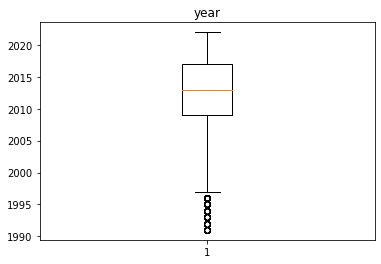

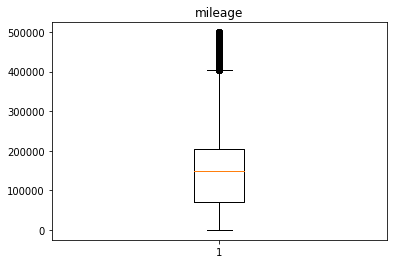

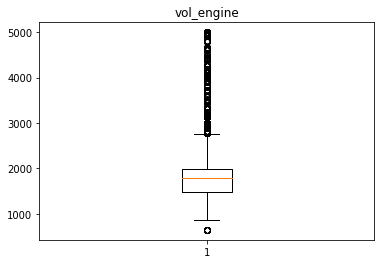

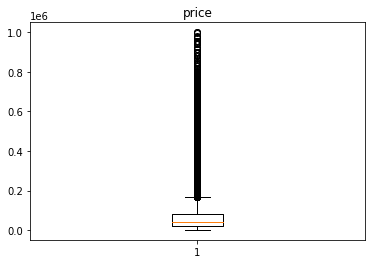

In [39]:
features = ['year',"mileage", "vol_engine", 'price' ]

for feature in features:
    plt.boxplot(Df[feature])
    plt.title(feature)
    plt.show()

In [40]:
df_1 = Df.copy()


In [41]:
df_1

,year,mileage,vol_engine,price,fuel_2,fuel_3,fuel_4,fuel_5,fuel_6
0,2015,139568,1248,35900,0,1,0,0,0
1,2018,31991,1499,78501,0,1,0,0,0
2,2015,278437,1598,27000,0,1,0,0,0
3,2016,47600,1248,30800,0,1,0,0,0
4,2014,103000,1400,35900,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
117922,2020,40000,1969,222790,0,0,1,0,0
117923,2017,51000,1969,229900,0,1,0,0,0
117924,2016,83500,1969,135000,0,0,0,0,1
117925,2017,174000,1969,154500,0,1,0,0,0


**By seeing the Box plot we can see the skewness presence in most of the variables, transformation is only necessary for the regression algorithams**

In [42]:
#check for skew
for feature in features:
    print(feature ," - ", df_1[feature].skew())

year  -  -0.3205556001729698
mileage  -  0.1871431240021652
vol_engine  -  1.856857999983878
price  -  3.399975139489164


In [43]:
#there is a presence of skewness, data needs transformation
from scipy import stats
from pylab import *
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=plt)
    plt.show()

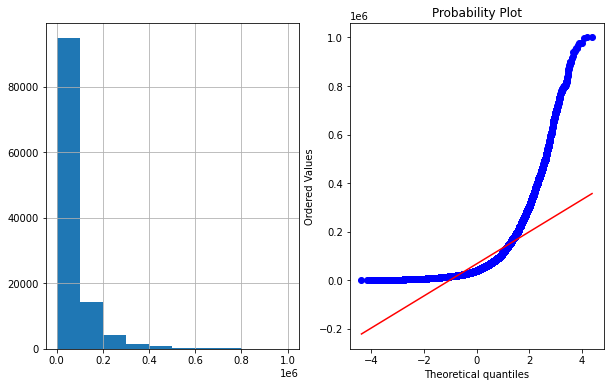

In [44]:
plot_data(df_1,'price')

In [45]:
#used BOXCOX method to transfer price 
df_1['price'],parameters=stats.boxcox(df_1['price'])

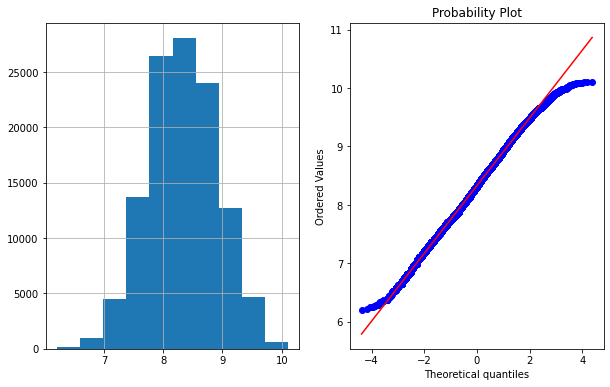

In [46]:
plot_data(df_1,'price')

In [47]:
df_1

,year,mileage,vol_engine,price,fuel_2,fuel_3,fuel_4,fuel_5,fuel_6
0,2015,139568,1248,8.243065,0,1,0,0,0
1,2018,31991,1499,8.707489,0,1,0,0,0
2,2015,278437,1598,8.069572,0,1,0,0,0
3,2016,47600,1248,8.150053,0,1,0,0,0
4,2014,103000,1400,8.243065,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
117922,2020,40000,1969,9.300208,0,0,1,0,0
117923,2017,51000,1969,9.317603,0,1,0,0,0
117924,2016,83500,1969,9.019254,0,0,0,0,1
117925,2017,174000,1969,9.095587,0,1,0,0,0


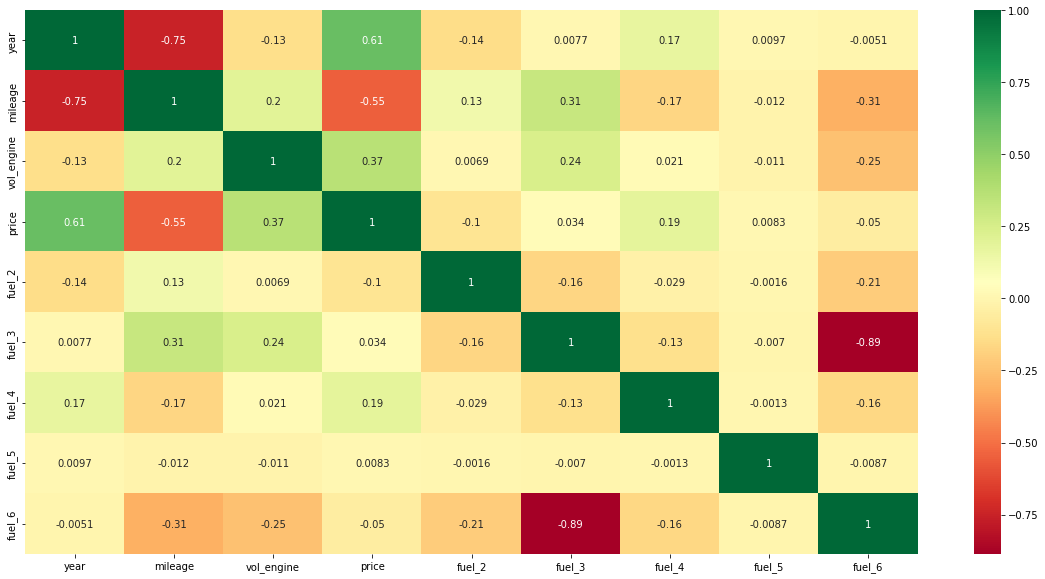

In [48]:
#check the correlation plot

corrmat=df_1.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,10))

#plot heatmap

g=sns.heatmap(Df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [49]:
df_1.isna().sum()

year          0
mileage       0
vol_engine    0
price         0
fuel_2        0
fuel_3        0
fuel_4        0
fuel_5        0
fuel_6        0
dtype: int64

In [50]:
list_Indpndt_features = [feature for feature in df_1.columns if 'price' not in feature ]
list_Indpndt_features

['year',
 'mileage',
 'vol_engine',
 'fuel_2',
 'fuel_3',
 'fuel_4',
 'fuel_5',
 'fuel_6']

In [51]:
#Lets not conside dummy variables other parameters looks less than 10, looks fine for prediction
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] =df_1[list_Indpndt_features].columns
  
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_1[list_Indpndt_features].values, i)
                          for i in range(len(df_1[list_Indpndt_features].columns))]
  
print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


      feature          VIF
0        year  2439.029880
1     mileage     4.165353
2  vol_engine    12.487326
3      fuel_2    90.853478
4      fuel_3  1021.314899
5      fuel_4    55.450387
6      fuel_5     1.169106
7      fuel_6  1283.060214


In [52]:
#Assumptions of Dependent and Independent Features
#Null Hypothesis 1 : - The Independent features are Highly corelated with each othe
for i in range (0,len(list_Indpndt_features)):
    for j in range (i+1 , len(list_Indpndt_features)):
        correlation  = df_1[list_Indpndt_features[i]].corr(df_1[list_Indpndt_features[j]])
        if (correlation<=-0.5):
            print( list_Indpndt_features[i],' & ', list_Indpndt_features[j] , " = " , correlation)

year  &  mileage  =  -0.749563131829772
fuel_3  &  fuel_6  =  -0.8865679308360928


**Stopped here**

In [53]:
df_2 = df_1.copy()


In [54]:
df_3 = df_1.copy()
df_3

,year,mileage,vol_engine,price,fuel_2,fuel_3,fuel_4,fuel_5,fuel_6
0,2015,139568,1248,8.243065,0,1,0,0,0
1,2018,31991,1499,8.707489,0,1,0,0,0
2,2015,278437,1598,8.069572,0,1,0,0,0
3,2016,47600,1248,8.150053,0,1,0,0,0
4,2014,103000,1400,8.243065,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
117922,2020,40000,1969,9.300208,0,0,1,0,0
117923,2017,51000,1969,9.317603,0,1,0,0,0
117924,2016,83500,1969,9.019254,0,0,0,0,1
117925,2017,174000,1969,9.095587,0,1,0,0,0


In [55]:
df_2.head()

,year,mileage,vol_engine,price,fuel_2,fuel_3,fuel_4,fuel_5,fuel_6
0,2015,139568,1248,8.243065,0,1,0,0,0
1,2018,31991,1499,8.707489,0,1,0,0,0
2,2015,278437,1598,8.069572,0,1,0,0,0
3,2016,47600,1248,8.150053,0,1,0,0,0
4,2014,103000,1400,8.243065,0,0,0,0,0


**Modeling and Evaulation**

In [56]:
# Data preperation fro Modelling Creating a Dataframe without target variable

from sklearn.model_selection import train_test_split

Y = df_2['price']
Y

columns =['price']

X = Delete_data(df_2, columns)
X

,year,mileage,vol_engine,fuel_2,fuel_3,fuel_4,fuel_5,fuel_6
0,2015,139568,1248,0,1,0,0,0
1,2018,31991,1499,0,1,0,0,0
2,2015,278437,1598,0,1,0,0,0
3,2016,47600,1248,0,1,0,0,0
4,2014,103000,1400,0,0,0,0,0
...,...,...,...,...,...,...,...,...
117922,2020,40000,1969,0,0,1,0,0
117923,2017,51000,1969,0,1,0,0,0
117924,2016,83500,1969,0,0,0,0,1
117925,2017,174000,1969,0,1,0,0,0


**Lasso regression**

In [57]:
# Creating a Dataframes of Training and Test sets in 80:20 Ratio using  sklearn - train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size = 0.25,  random_state=0 )

In [58]:
# Data preperation for Modelling :: checking the lengths of Train and Test Sets

print('Length of X Train :', len(X_Train) )
print('Length of X Test  :', len(X_Test) )

Length of X Train : 86957
Length of X Test  : 28986


In [62]:
# Modelling and Implementation :: Importing, modelling and Implementing the Lasso Regression Model
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet, ElasticNetCV

Lasso_model = Lasso(alpha=0.5)

Model_Evaluation(Lasso_model, 'Lasso')

Below are the Results of the ModelLasso
The Accuracy of the model is:

0.8126569725106297
The Mean Square Error Value of the model

0.06282660731063426
The Root Mean Square Error of the model

0.25065236346508735
The R - Squared Value of the model:

0.8150801925785551
The Adjusted R - Square Value of the model:

0.815063178288872


In [63]:
# Data preperation for Modelling :: checking the lengths of Train and Test Sets

print('Length of X Train :', len(X_Train) )
print('Length of X Test  :', len(X_Test) )

Length of X Train : 86957
Length of X Test  : 28986


we used randomised search cv to find the better lamda or alpha value

In [64]:
from scipy.stats import uniform 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import RidgeCV, Lasso

param_grid = {'alpha': uniform()}

model = Lasso()
rand_search = RandomizedSearchCV(estimator=model, 
                                 param_distributions=param_grid,
                                 n_iter=10)

rand_search.fit(X_Train,Y_Train)

print(rand_search.best_estimator_.alpha)
print(rand_search.best_score_)
print(rand_search.best_params_)

0.05179253248302129
0.8690961304392124
{'alpha': 0.05179253248302129}


In [65]:
# Modelling and Implementation :: Importing, modelling and Implementing the Lasso Regression Model
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet, ElasticNetCV

Lasso_model = Lasso(alpha=0.05)

Model_Evaluation(Lasso_model, 'Lasso')

Below are the Results of the ModelLasso
The Accuracy of the model is:

0.8699621693774764
The Mean Square Error Value of the model

0.04360896602096168
The Root Mean Square Error of the model

0.2088275988009288
The R - Squared Value of the model:

0.8691744502159754
The Adjusted R - Square Value of the model:

0.8691624130857565


**Random Forest**

In [66]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

#estimator give no of trees
#This parameter makes a solution easy to replicate
rf = RandomForestRegressor(n_estimators = 10, random_state = 24,max_depth = 4 , min_samples_split=5 , min_impurity_decrease = 0, n_jobs =-1)

Model_Evaluation(rf, 'RandomForestRegressor')

Below are the Results of the ModelRandomForestRegressor
The Accuracy of the model is:

0.8417692525085148
The Mean Square Error Value of the model

0.053063629697559726
The Root Mean Square Error of the model

0.2303554420836628
The R - Squared Value of the model:

0.8425174485033617
The Adjusted R - Square Value of the model:

0.8425029586886222


**Checking most important factors**

In [67]:
#takin the list of features dependent variables
feature_list = list(X.columns)
features = np.array(features)
# Get the impt features feature_importances_ Lib taken from sklearn

importances = list(rf.feature_importances_)

# List of variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important in assending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print the impt feature
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: year                 Importance: 0.85
Variable: vol_engine           Importance: 0.15
Variable: mileage              Importance: 0.0
Variable: fuel_2               Importance: 0.0
Variable: fuel_3               Importance: 0.0
Variable: fuel_4               Importance: 0.0
Variable: fuel_5               Importance: 0.0
Variable: fuel_6               Importance: 0.0


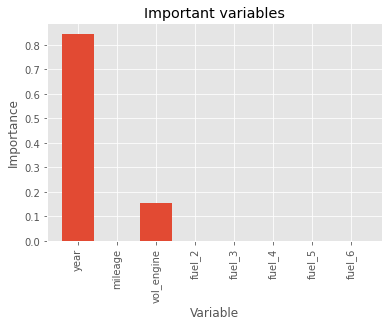

In [68]:
#plotting the important variables found
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('ggplot')
# list of x locations for plotting
x_axis = list(range(len(importances)))
#plot bar chart
plt.bar(x_axis, importances, orientation = 'vertical')
# labels for x axis
plt.xticks(x_axis, feature_list, rotation='vertical')
# labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Important variables');

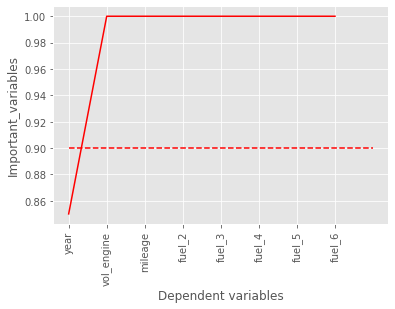

In [69]:
# sorth important variables in assending order and plot 
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
#importances
sorted_variables = np.cumsum(sorted_importances)
# create a line graph
plt.plot(x_axis, sorted_variables, 'r-')
# take the only variables which are retained
plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_axis, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Dependent variables'); plt.ylabel('Important_variables');

In [70]:
# randomforest calculation only with impt variables 
from sklearn.ensemble import RandomForestRegressor
rf_most_important = RandomForestRegressor(n_estimators=200, random_state=0)

In [71]:
#taking only important variables to perform model operation
Y1 = df_3['price']
Y1

columns1 =['mileage',	'fuel_2',	'fuel_3',	'fuel_4',	'fuel_5',	'fuel_6','price']

X1 = Delete_data(df_3, columns1)
X1

,year,vol_engine
0,2015,1248
1,2018,1499
2,2015,1598
3,2016,1248
4,2014,1400
...,...,...
117922,2020,1969
117923,2017,1969
117924,2016,1969
117925,2017,1969


In [72]:
# Creating a Dataframes of Training and Test sets in 75:25 Ratio using  sklearn - train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X1,Y1,test_size = 0.25,  random_state=0 )

In [73]:
# Train the random forest
rf_most_important.fit(X_Train, Y_Train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [74]:
from sklearn.ensemble import RandomForestRegressor

#estimator give no of trees
#This parameter makes a solution easy to replicate
rf = RandomForestRegressor(n_estimators = 200, random_state = 0)

Model_Evaluation(rf, 'RandomForestRegressor')

Below are the Results of the ModelRandomForestRegressor
The Accuracy of the model is:

0.9113592242602822
The Mean Square Error Value of the model

0.029726215508208923
The Root Mean Square Error of the model

0.17241292152332702
The R - Squared Value of the model:

0.917833640573109
The Adjusted R - Square Value of the model:

0.9178317506920356


**Check how to fit best line**

**XG Boost**

rerun the split to pass default x and y values


In [75]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size = 0.25,  random_state=0 )

In [76]:
# Modelling and Implementation :: Importing, modelling and Implementing the XG Boost Model

from xgboost import XGBRegressor

XGBRegressor_model = XGBRegressor(colsample_bytree = 0.7, learning_rate= 0.1, max_depth = 6, n_estimators = 100,verbosity = 0)

Model_Evaluation(XGBRegressor_model, 'XGBRegressor')

Below are the Results of the ModelXGBRegressor
The Accuracy of the model is:

0.9163775117899801
The Mean Square Error Value of the model

0.028043302702616804
The Root Mean Square Error of the model

0.16746134689120593
The R - Squared Value of the model:

0.9196432414516403
The Adjusted R - Square Value of the model:

0.9196358479052863


In [77]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [10, 100],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_Train,Y_Train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[12:13:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:13:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:01] WARNING: /workspace/src/objective/regr

In [78]:
# Modelling and Implementation :: Importing, modelling and Implementing the XG Boost Model after Hypertuning

from xgboost import XGBRegressor

XGBRegressor_model = XGBRegressor(colsample_bytree = 0.7, learning_rate= 0.1, max_depth = 10, n_estimators = 100)

Model_Evaluation(XGBRegressor_model, 'XGBRegressor')

[12:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Below are the Results of the ModelXGBRegressor
The Accuracy of the model is:

0.9230269289535024
The Mean Square Error Value of the model

0.025813380796391207
The Root Mean Square Error of the model

0.16066543124266405
The R - Squared Value of the model:

0.93572044895317
The Adjusted R - Square Value of the model:

0.9357145346548724


**KNN**

In [79]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 

In [80]:
rmse_val2 = [] #to store rmse values for different k
model_Knn = neighbors.KNeighborsRegressor(n_neighbors = 2)
Model_Evaluation(model_Knn, 'KNN')

Below are the Results of the ModelKNN
The Accuracy of the model is:

0.6855567797645855
The Mean Square Error Value of the model

0.1054504188598253
The Root Mean Square Error of the model

0.32473130255616767
The R - Squared Value of the model:

0.9019566729039765
The Adjusted R - Square Value of the model:

0.9019476520338384


In [81]:
rmse_val2 = [] #to store rmse values for different k
for K in range(15):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_Train, Y_Train)  #fit the model
    pred=model.predict(X_Test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_Test, pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.3555117213445995
RMSE value for k=  2 is: 0.32473130255616667
RMSE value for k=  3 is: 0.3158536880375987
RMSE value for k=  4 is: 0.31319389763807465
RMSE value for k=  5 is: 0.31146335350476306
RMSE value for k=  6 is: 0.3118522050611717
RMSE value for k=  7 is: 0.31229664392400314
RMSE value for k=  8 is: 0.31258435518087196
RMSE value for k=  9 is: 0.31334305626120806
RMSE value for k=  10 is: 0.3138974290723859
RMSE value for k=  11 is: 0.3144836303019165
RMSE value for k=  12 is: 0.3151957279366324
RMSE value for k=  13 is: 0.3159626322569729
RMSE value for k=  14 is: 0.31701510327738935
RMSE value for k=  15 is: 0.31780939135420555


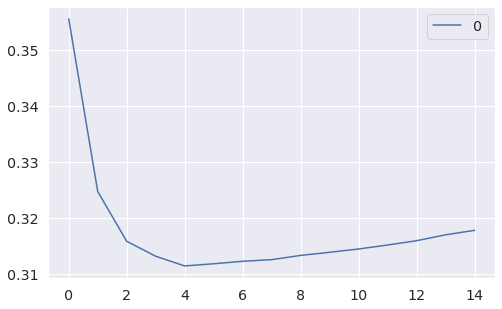

In [82]:
#plotting the rmse values against k values
import seaborn as sns

sns.set(font_scale=1.3)

curve = pd.DataFrame(rmse_val2) #elbow curve 
curve.plot(figsize=(8,5))

In [83]:
rmse_val2 = [] #to store rmse values for different k
model_Knn = neighbors.KNeighborsRegressor(n_neighbors = 4)
Model_Evaluation(model_Knn, 'KNN')

Below are the Results of the ModelKNN
The Accuracy of the model is:

0.707503610777386
The Mean Square Error Value of the model

0.09809041751772864
The Root Mean Square Error of the model

0.3131938976380744
The R - Squared Value of the model:

0.8341015187042234
The Adjusted R - Square Value of the model:

0.834086254548057
